In [3]:
# prompt: write the code to import numpy, pandas, warnings, matplotlib and nltk

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import nltk


In [5]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [12]:
train.head()

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


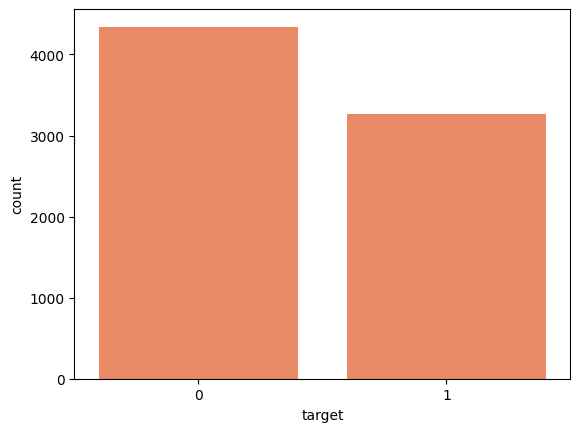

In [8]:
import seaborn as sns

sns.countplot(x = "target", data = train, color = "coral")
plt.show()

In [11]:
# length of tweets aka length of chars involved...

train["text_len"] = train.text.apply(len)
test["text_len"] = test.text.apply(len)

In [17]:
# length of the words in tweets
#len(train.text[0].split())
train["word_count"] = train.text.apply(lambda x:len(str(x).split()))
test["word_count"] = test.text.apply(lambda x:len(str(x).split()))


In [18]:
# Lets set the theme of the plot

sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-paper")

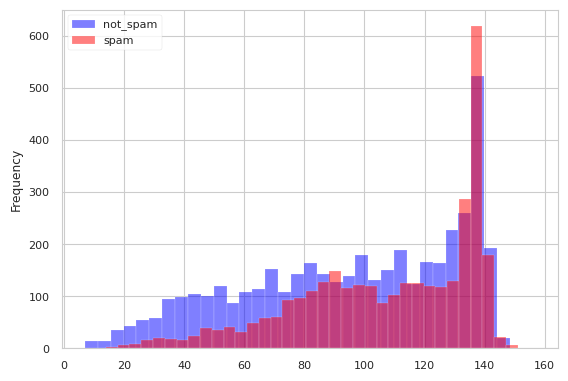

In [22]:
# Lets plot the text length

train.loc[train.target==0, "text_len"].plot(kind = "hist", alpha = 0.5,
                                            color = "blue", bins = 35, label = "not_spam")
train.loc[train.target==1, "text_len"].plot(kind = "hist", alpha = 0.5,
                                            color = "red", bins = 35, label = "spam")
plt.legend()
plt.show()

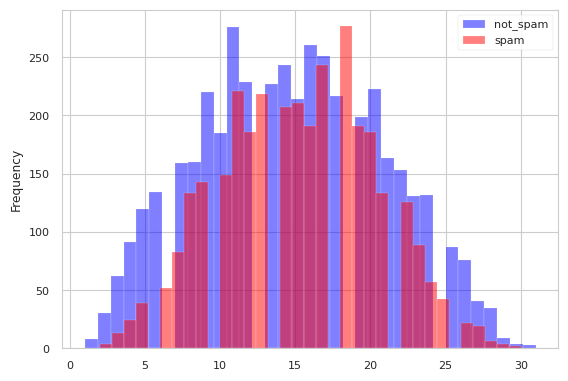

In [23]:
# Lets plot the word

train.loc[train.target==0, "word_count"].plot(kind = "hist", alpha = 0.5,
                                            color = "blue", bins = 35, label = "not_spam")
train.loc[train.target==1, "word_count"].plot(kind = "hist", alpha = 0.5,
                                            color = "red", bins = 35, label = "spam")
plt.legend()
plt.show()

### Text PreProcessing

In [25]:
train.loc[train.target==1, "text_len"].describe()

count    3271.000000
mean      108.113421
std        29.309854
min        14.000000
25%        88.000000
50%       115.000000
75%       136.000000
max       151.000000
Name: text_len, dtype: float64

In [26]:
train.loc[train.target==0, "text_len"].describe()

count    4342.000000
mean       95.706817
std        35.885924
min         7.000000
25%        68.000000
50%       101.000000
75%       130.000000
max       157.000000
Name: text_len, dtype: float64

In [32]:
print(train.loc[train.text_len==151, "text"])

614    @CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...
Name: text, dtype: object


In [63]:
tweet ="@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT..http://regex101.com/"
#train.loc[614, "text"]

import re
#re.sub('[^a-zA-Z0-9]+'," ", tweet).strip()

#re.sub('@[a-zA-Z0-9]+|\W', " ", tweet).strip() # This code removes @mentions....

re.findall('(https:.?\W+/\S+)|(http:.?\W+/\S+)|www.?\W+/\S+', tweet)

# Symbols: d, w W, [a-zA-Z0-9], /\

['http://regex101.com/']

In [49]:
#re.findall('[^a-zA-Z0-9]+', tweet)
re.findall('\d+', tweet) # Give me everything expect text ~noise

['90', '8', '2']

In [114]:
def clean_text(text):
  text = re.sub('@[a-zA-Z0-9]+', " ", text) # removes @mentions
  text  =re.sub('(https:.?\W+/\S+)|(http:.?\W+/\S+)', " ", text) # eliminate hyperlink
  text  =re.sub('www.\S+', " ", text) # removes www hyperlink
  text = re.sub('[^a-zA-Z0-9]', " ", text) # removes special characters
  text = re.sub("\d", " ", text)
  text = re.sub('\s+', " ", text).strip()
  return(text)

In [115]:
# Clean the text using the function

train["clean_text"] = train.text.apply(clean_text)
test["clean_text"] = test.text.apply(clean_text)

In [116]:
import string
noise = string.punctuation

train["clean_text"] = [text for text in train.clean_text if text not in noise]
test["clean_text"] = [text for text in test.clean_text if text not in noise]

In [117]:
train.head()

,id,keyword,location,text,target,text_len,word_count,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,13,Our Deeds are the Reason of this earthquake Ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,7,Forest fire near La Ronge Sask Canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,22,All residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,16,Just got sent this photo from Ruby Alaska as s...


In [118]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')
#print(stopwords.words("english"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
# tokenize the sentences - Converting the sentences into words
# Step 2: generate a frequency table of the tokens generated
# Step 3: Create a Word Cloud

#[word_tokenize(word) for word in train.clean_text]

words = []
for i in train.clean_text:
  words.append(word_tokenize(i))

# Remove the Stopwords

stop =set(stopwords.words("english"))
stop.add("would")
all_tokens = [token for review_token in words for token \
              in review_token if token.lower() not in stop]

In [135]:
# Build a DataFrame and the Frequency Table

df = pd.DataFrame(FreqDist(all_tokens).items(), columns=["Tokens", "Count"]).\
sort_values(by = "Count", ascending = False)


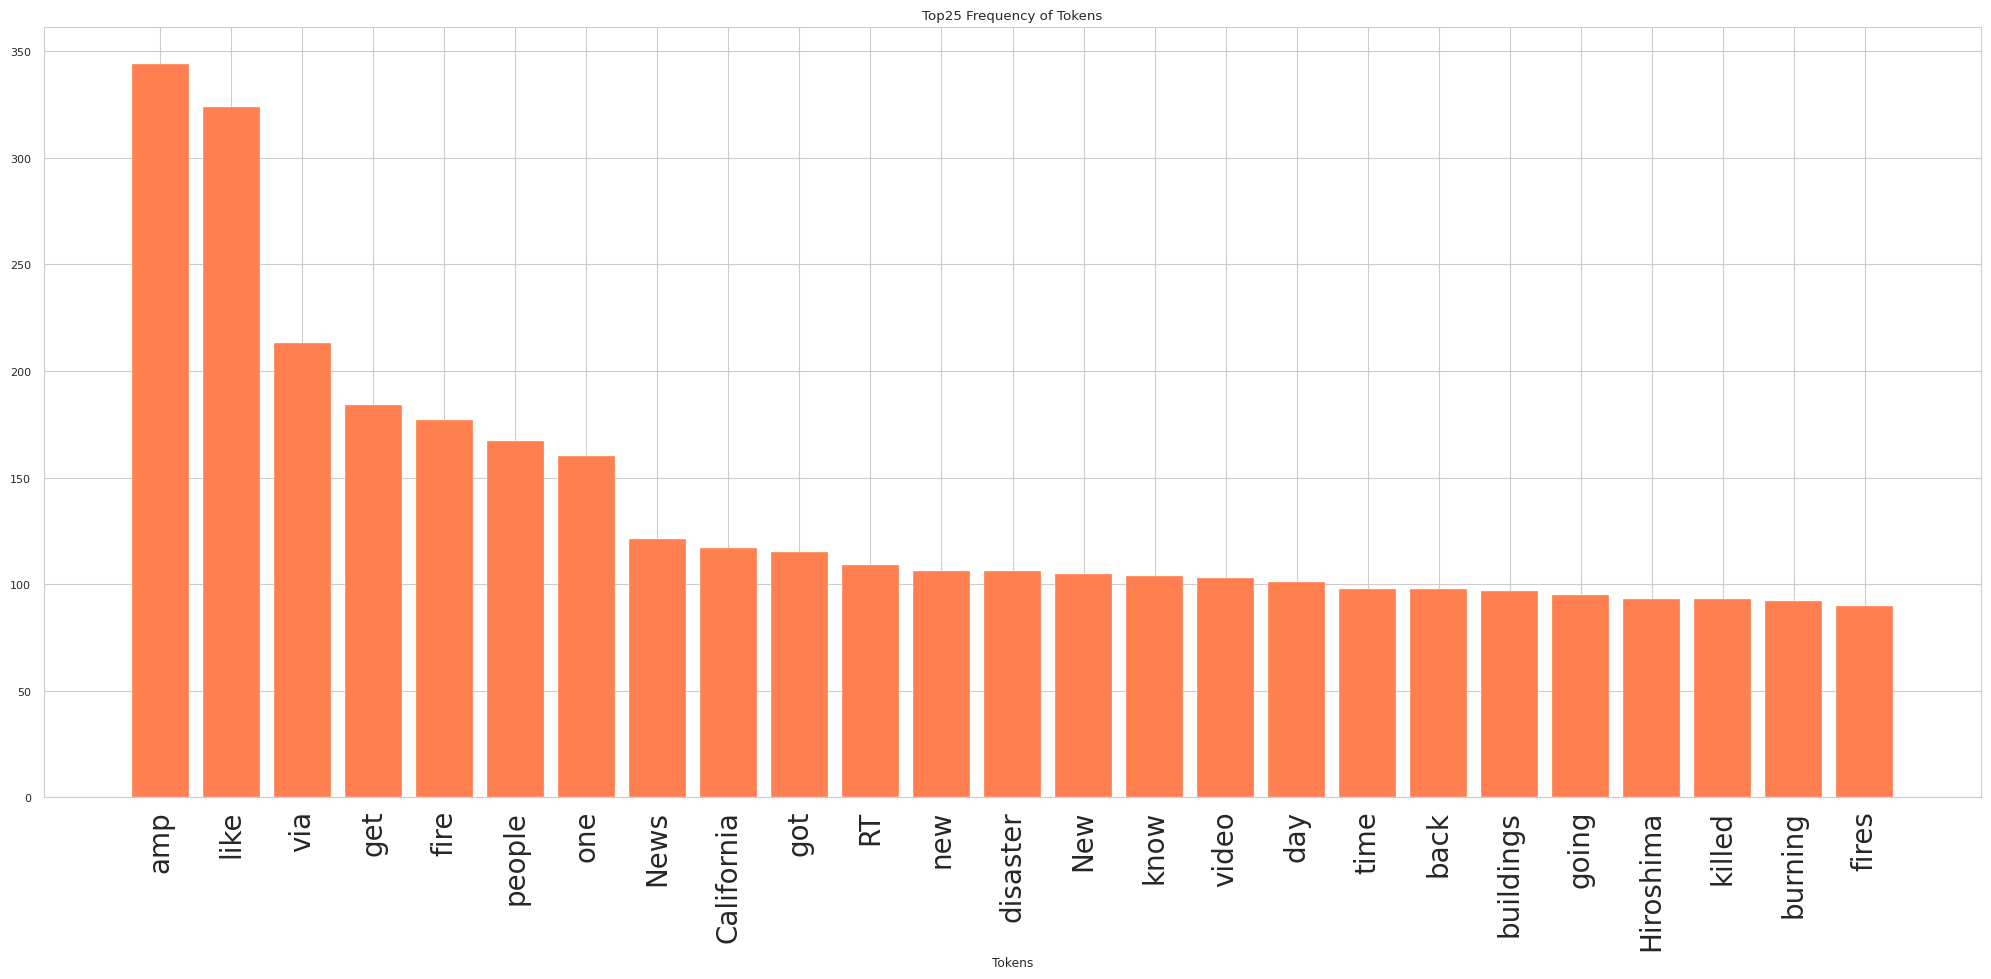

In [136]:
# Plot the 25 Tokens Frequency
plt.figure(figsize=(25, 10))
plt.bar(df["Tokens"][:25], df["Count"][:25], color = "coral")
plt.xlabel("Tokens")
plt.xticks(size = 20, rotation = 90)
plt.title("Top25 Frequency of Tokens")
plt.show()

## Bag of Words Model

* Bag of Words simply represent how many times a given word has appeared in the body of text

Pros: Simple & Easy to Use
Cons: Semantic Meaning gets lost. Each Word is used in the individual capacity to build the model
Cons: Sparse Matrix(High Dimensional Data)

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
cov = CountVectorizer(stop_words = "english",
                      token_pattern='[a-zA-Z0-9]+')

converted = cov.fit_transform(all_tokens).todense()

print(converted.shape)
print(len(cov.get_feature_names_out()))

(66843, 13916)
13916


In [146]:
#pd.DataFrame(converted, columns = cov.get_feature_names_out())

In [155]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

xtrain, xtest, ytrain, ytest = train_test_split(pd.DataFrame(converted[:7613]),
                                                train.target, test_size = 0.20,
                                                random_state = 13916)

In [157]:
pred = rf.fit(xtrain, ytrain).predict(xtest)

print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65       868
           1       0.41      0.22      0.29       655

    accuracy                           0.53      1523
   macro avg       0.49      0.49      0.47      1523
weighted avg       0.50      0.53      0.49      1523

